# Loading results

In [7]:
import DirectDmTargets as dddm

In [8]:
import corner

In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
import os

In [12]:
import multihist as mh

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

In [13]:
# loading normal results.
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle_restart", i)
        print()
    except FileNotFoundError:
        pass

load_nestle_samples::	loading results/../../results/nestle_restart0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart3/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart4/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart5/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart6/
load_nestle

['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart41/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart42/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart43/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart44/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'n

In [14]:
results.keys()

dict_keys([0, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [15]:
det = "Ge"
print(f"selecting {det} dataset")
selected_keys = []
for i in results.keys():
    if results[i]['config']['n_energy_bins'] == 10:
        if results[i]['config']['detector'] == det:
            print(i,
                  results[i]['config']['notes'], 
                  10**results[i]['config']['mw'],
                  np.shape(results[i]['samples']))
            selected_keys.append(i)    
selected_keys

selecting Ge dataset
3 nestle_14nov_notmerged 25.000000000000007 (11818, 2)
5 nestle_14nov_notmerged 249.99999999999994 (10891, 2)
6 nestle_14nov_notmerged 49.99999999999999 (13210, 2)
10 nestle_14nov_notmerged 25.000000000000007 (11726, 5)
14 nestle_14nov_notmerged 249.99999999999994 (10855, 5)
15 nestle_14nov_notmerged 49.99999999999999 (12841, 5)
37 nestle_15nov 25.000000000000007 (12932, 2)
39 nestle_15nov 249.99999999999994 (10552, 2)
40 nestle_15nov 49.99999999999999 (12983, 2)
43 nestle_15nov 249.99999999999994 (10543, 5)
45 nestle_15nov 25.000000000000007 (13184, 5)
46 nestle_15nov 49.99999999999999 (13020, 5)


[3, 5, 6, 10, 14, 15, 37, 39, 40, 43, 45, 46]

---3---


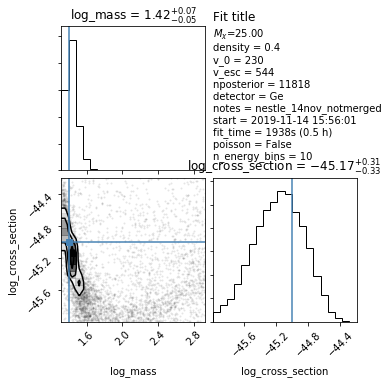

---5---


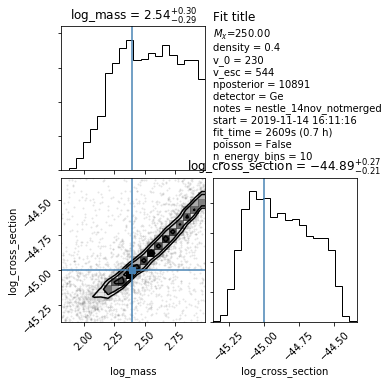

---6---


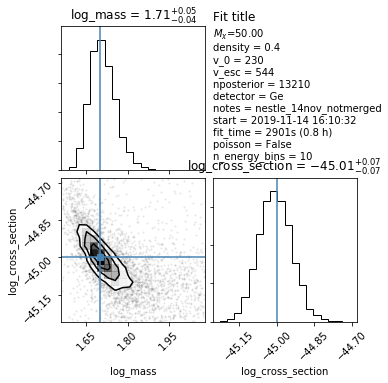

---10---


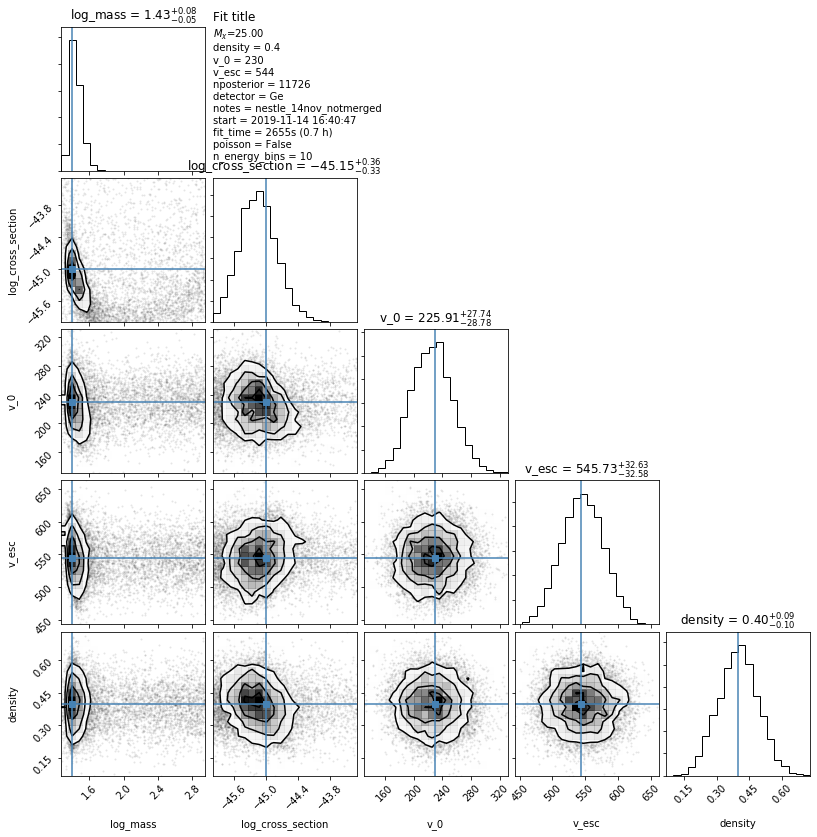

---14---


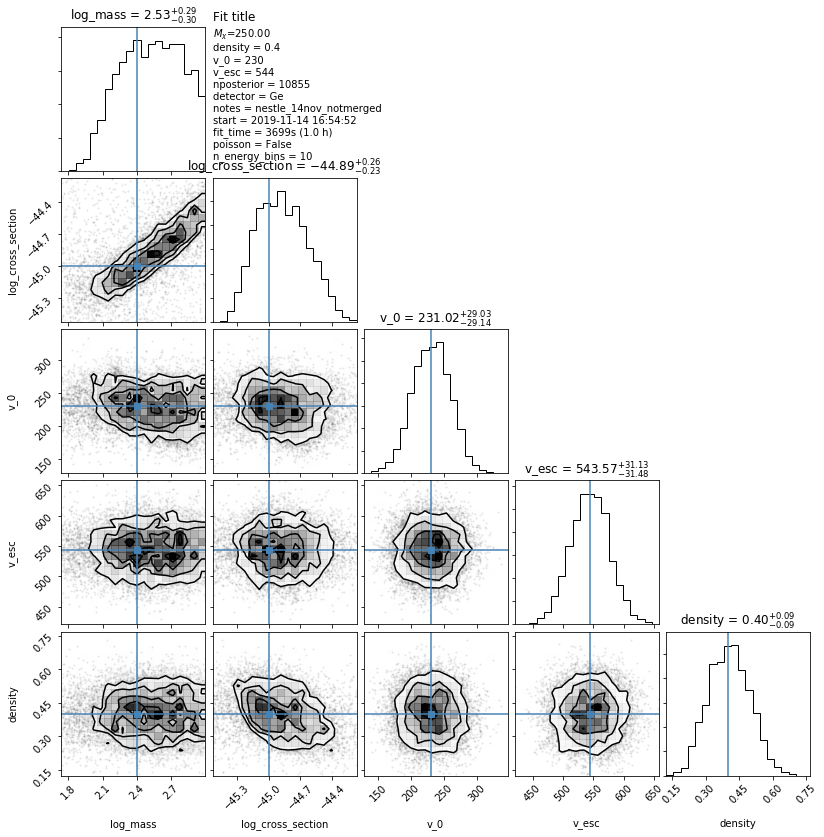

---15---


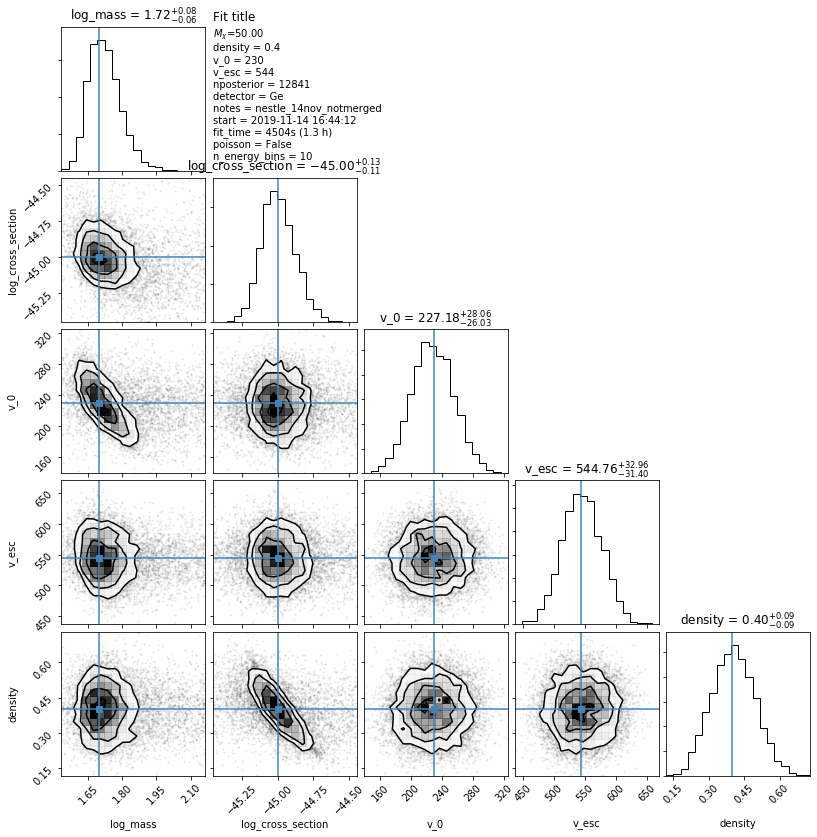

---37---


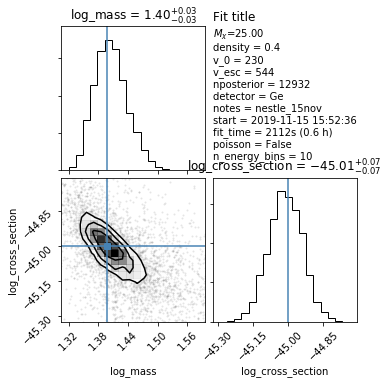

---39---


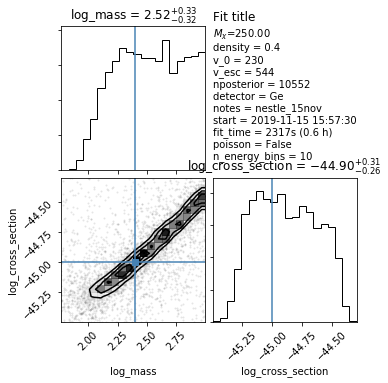

---40---


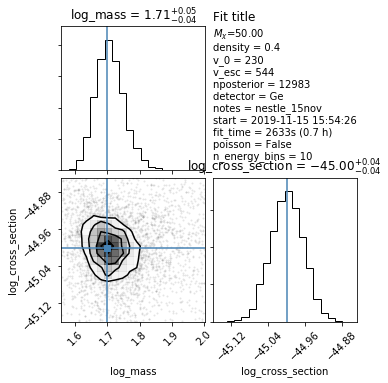

---43---


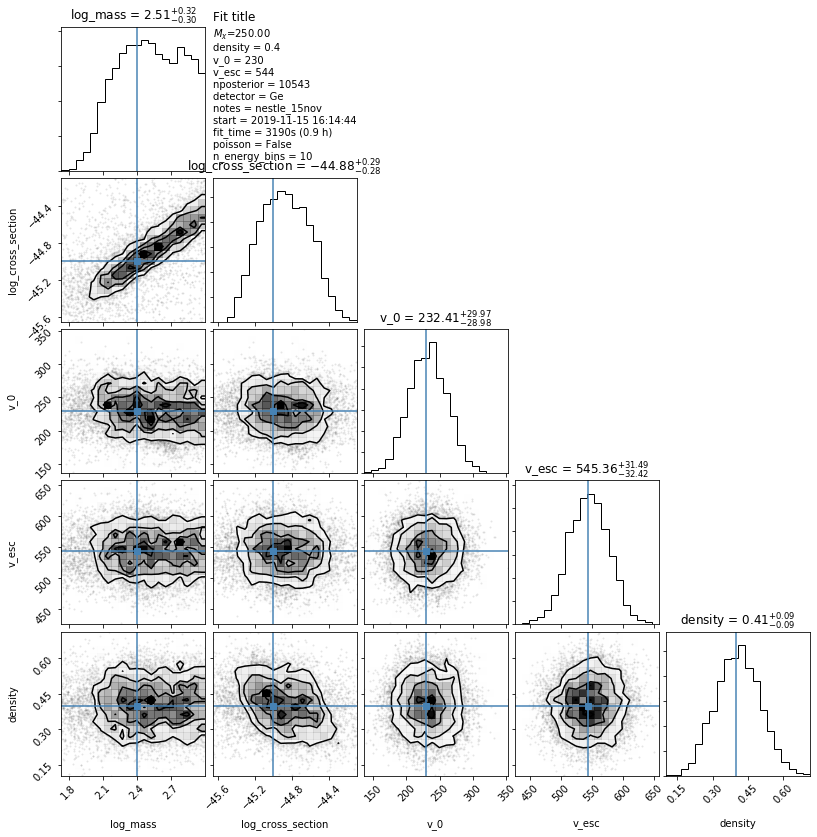

---45---


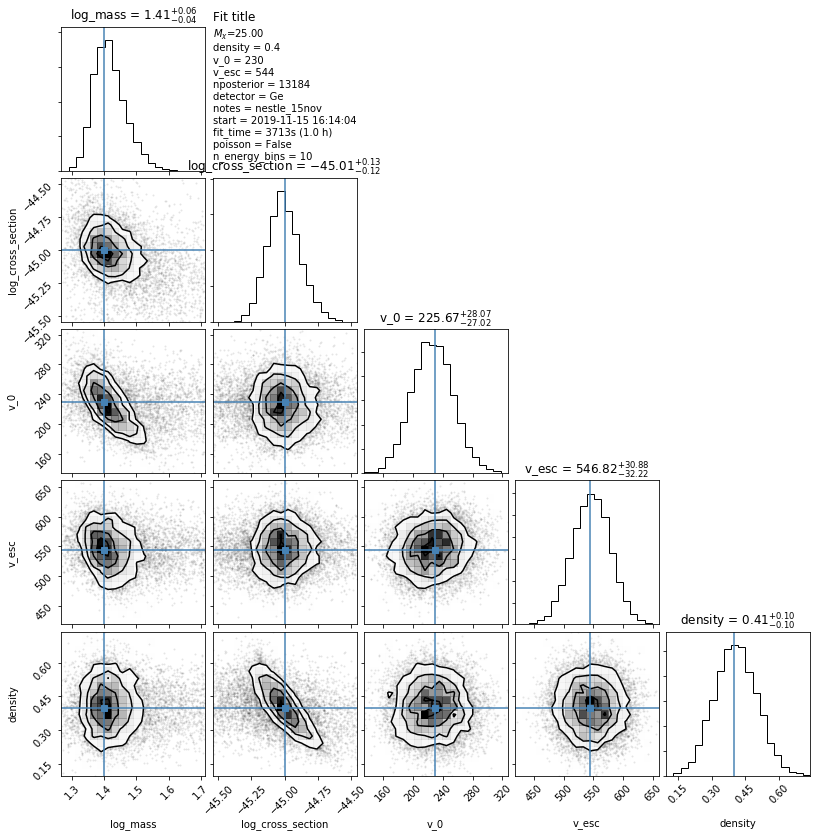

---46---


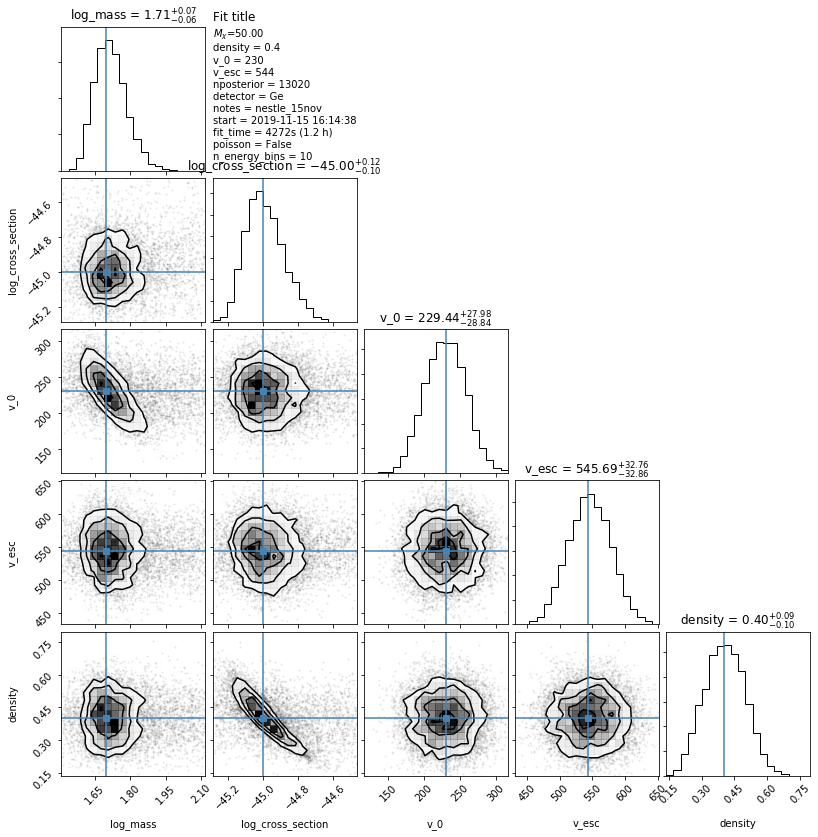

In [16]:
# for key in results.keys():
for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

In [18]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [19]:
def get_hist(item):
    nbins = 45
    bin_range = [[1, 3], [-45.7, -44.3]]
    counts, xedges, yedges = np.histogram2d(*get_p_i(item), bins = nbins, range = bin_range)
    return counts , xedges, yedges

def get_hist_norm(item):
    counts , xedges, yedges = get_hist(item)
    return counts/np.sum(counts) , xedges, yedges

In [20]:
# # fig = plt.figure(figsize=(7, 3))
# # ax = fig.add_subplot(131, title='imshow: square bins')
# from matplotlib.colors import LogNorm
# plt.imshow(test.T/np.sum(test.T), interpolation='nearest', origin='low',
#         extent=  [1, 3, -45.7, -44.3], norm=LogNorm())
# # plt.legend()
# plt.colorbar()

In [21]:
def get_p_i(i):
    return get_posterior(results[i]['samples'], results[i]['weights']).T[:2]

In [22]:
from matplotlib.colors import LogNorm
def combine_normalized(items):
    X, Y = np.meshgrid(*get_hist_norm(items[0])[1:])
    for i in items:
        c,_,_ = get_hist_norm(i)
        plt.imshow(c.T, interpolation='nearest', origin='low',
                extent= [1, 3, -45.7, -44.3], norm=LogNorm(vmin = 1e-4,vmax = 1))
# plt.legend()
    plt.colorbar()

In [25]:
items = selected_keys[:3]
def get_df(items):
#     df = pd.DataFrame()
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()
        
        test_df['$\log(M_\chi)$'] = posteriors[0]
        test_df['$\log(\sigma)$'] = posteriors[1]
        test_df['mass'] = 10**results[item]['config']['mw']
#         sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
        if j == 0:
            df = test_df
        else:
            df = pd.concat([df, test_df])
#     df = df.assign(industry='yyy')
    return df
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

[ 25.  50. 250.] 7862


$\log(M_\chi)$  $\log(\sigma)$  mass
0        1.848684      -45.920151  25.0
1        1.337351      -44.940696  25.0
2        1.658226      -45.653652  25.0

Wall time: 20 s


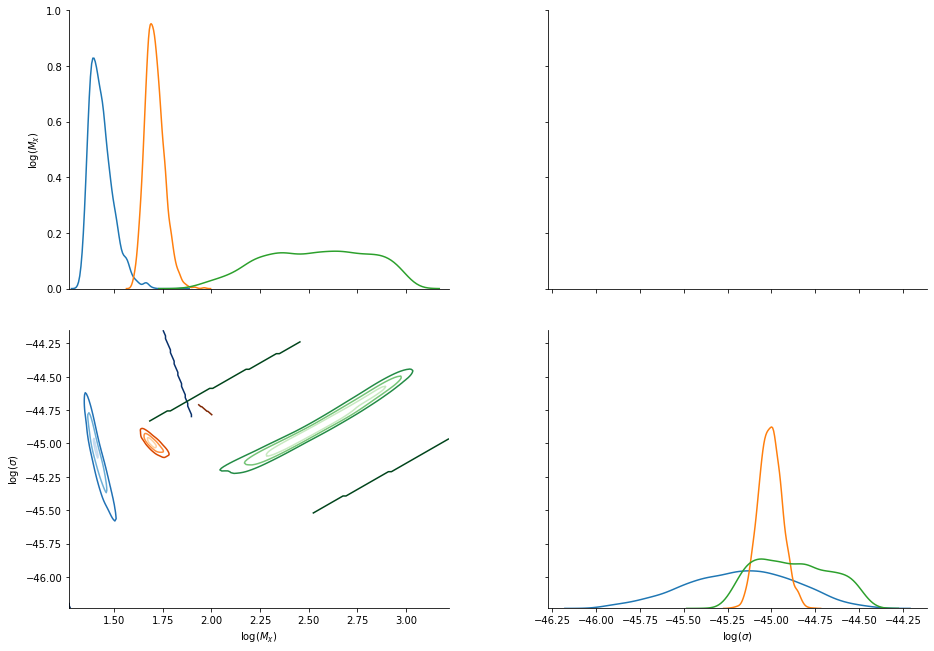

In [26]:
%%time

# data = sns.load_dataset('iris')
# plt.figure(figsize=(15,10))
def make_kde(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

def make_kde_cbar(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
kwargs ={"cbar":True, "n_levels":5}
make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
pg.map_lower(make_kde)
# pg.map_upper(make_kde_cbar)
pg.fig.set_size_inches(15,10)
pg.fig.savefig(f"{det}_fixed_astroph_def_prior.png", dpi =300)
pg.fig.savefig(f"{det}_fixed_astroph_def_prior.pdf", dpi =300)

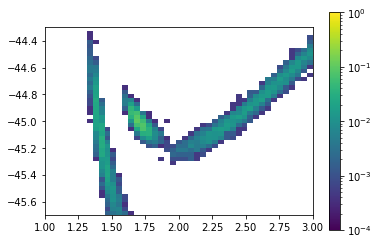

In [27]:
combine_normalized(selected_keys[:3])

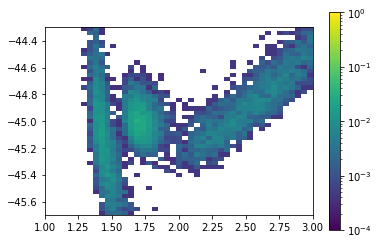

In [28]:
combine_normalized(selected_keys[3:6])

In [29]:
# loading normal results.
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle_17nov", i)
        print()
    except FileNotFoundError:
        pass

load_nestle_samples::	loading results/../../results/nestle_17nov0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_17nov12/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_17nov13/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_17nov14/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_17nov15/
load_nestle_sampl

In [31]:
print(f"selecting {det} dataset")
selected_keys = []
for i in results.keys():
    if results[i]['config']['n_energy_bins'] == 10:
        if results[i]['config']['detector'] == det:
            print(i,
                  results[i]['config']['notes'], 
                  10**results[i]['config']['mw'],
                  np.shape(results[i]['samples']))
            selected_keys.append(i)    
selected_keys

selecting Ge dataset
0 nestle++priors_17nov 49.99999999999999 (213818, 5)
14 nestle++priors_17nov 25.000000000000007 (214475, 2)
15 nestle++priors_17nov 249.99999999999994 (172532, 2)
18 nestle++priors_17nov 49.99999999999999 (214107, 2)
24 nestle++priors_17nov 249.99999999999994 (172076, 5)
25 nestle++priors_17nov 25.000000000000007 (214808, 5)
31 nestle++priors_17nov 25.000000000000007 (859044, 2)
32 nestle++priors_17nov 249.99999999999994 (689730, 2)


[0, 14, 15, 18, 24, 25, 31, 32]

---0---


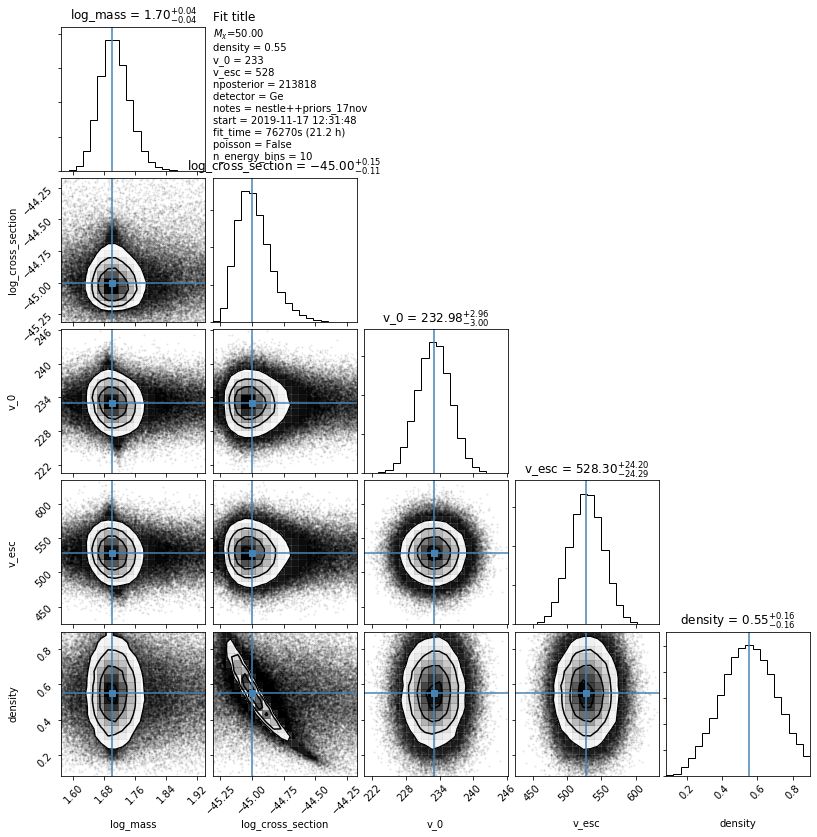

---14---


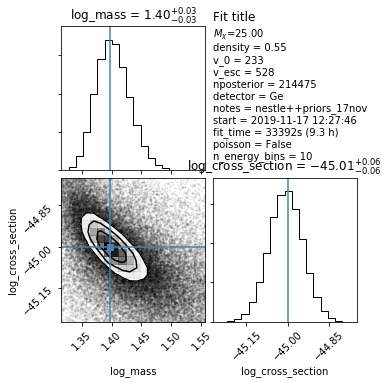

---15---


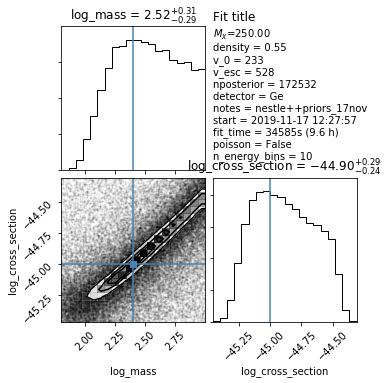

---18---


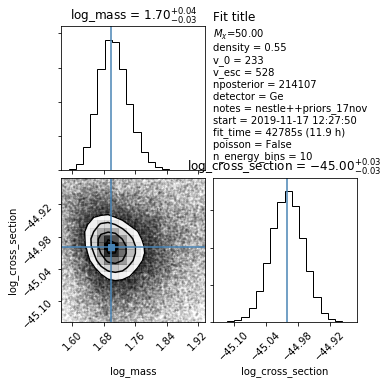

---24---


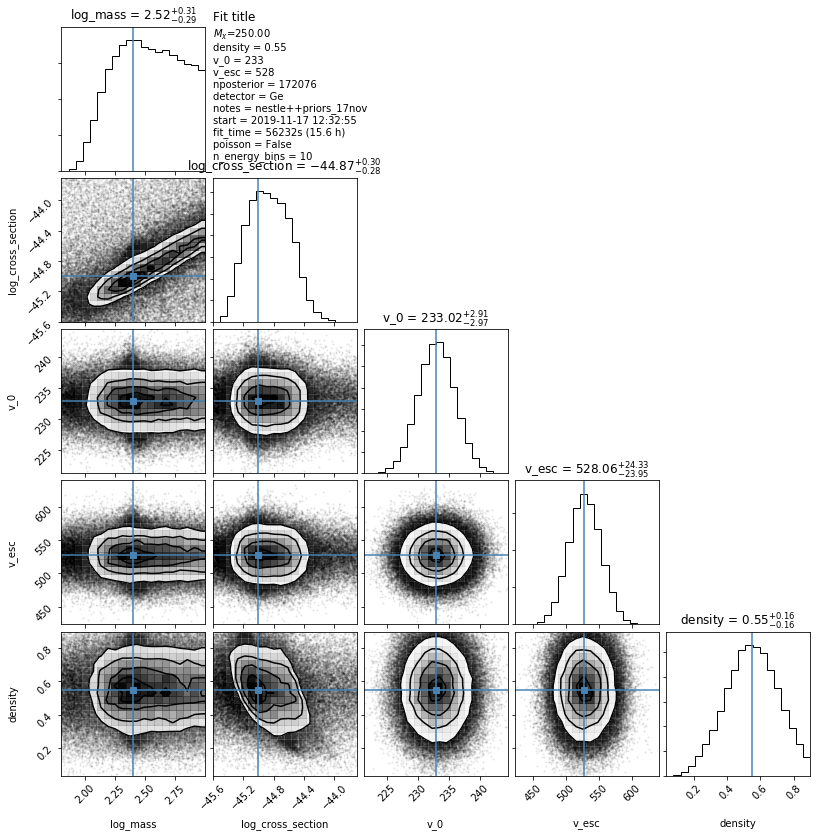

---25---


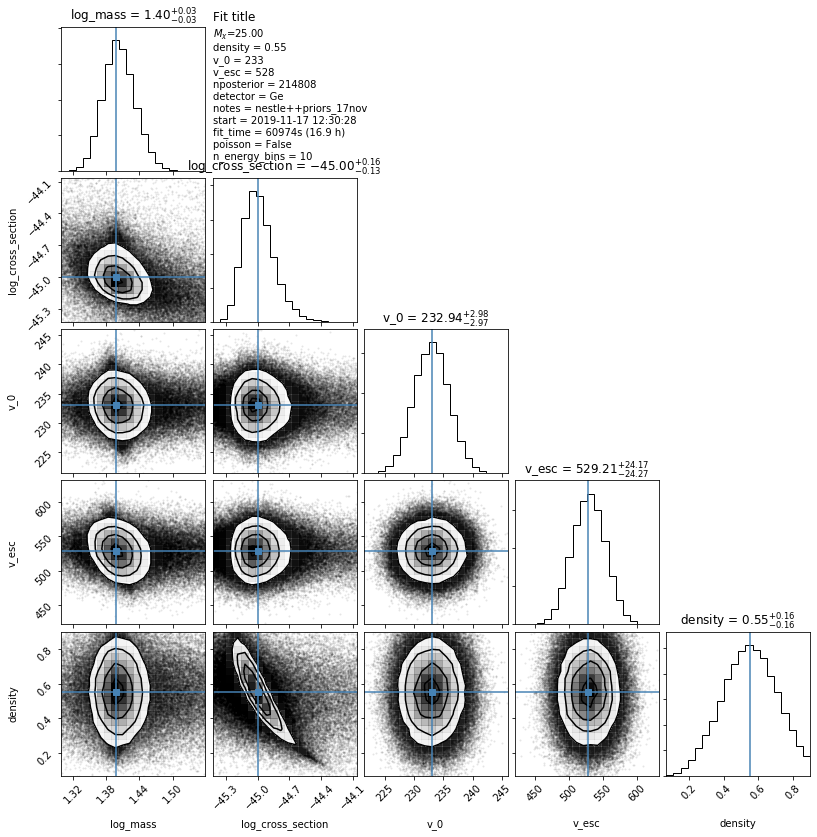

---31---


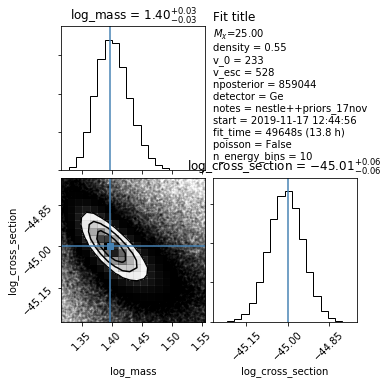

---32---


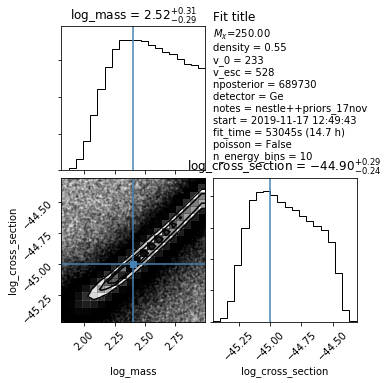

In [32]:
# for key in results.keys():
for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

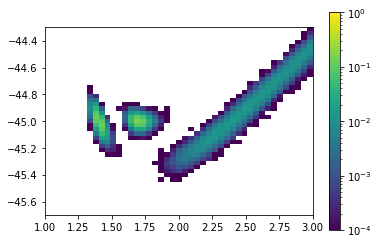

In [33]:
combine_normalized(selected_keys[1:4])

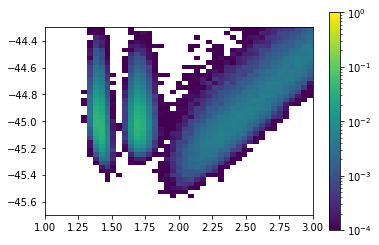

In [34]:
combine_normalized([selected_keys[0], *selected_keys[4:6]])

In [36]:
# items = selected_keys[:3]
def get_df(items):
#     df = pd.DataFrame()
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()
        
        test_df['$\log(M_\chi)$'] = posteriors[0]
        test_df['$\log(\sigma)$'] = posteriors[1]
        test_df['mass'] = 10**results[item]['config']['mw']
#         sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
        if j == 0:
            df = test_df
        else:
            df = pd.concat([df, test_df])
#     df = df.assign(industry='yyy')
    return df

In [37]:
items = [14,15,18]
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

[ 25.  50. 250.] 125975


$\log(M_\chi)$  $\log(\sigma)$  mass
0        1.376438      -45.137546  25.0
1        1.463983      -45.247240  25.0
2        1.506122      -45.249101  25.0

Wall time: 2min 52s


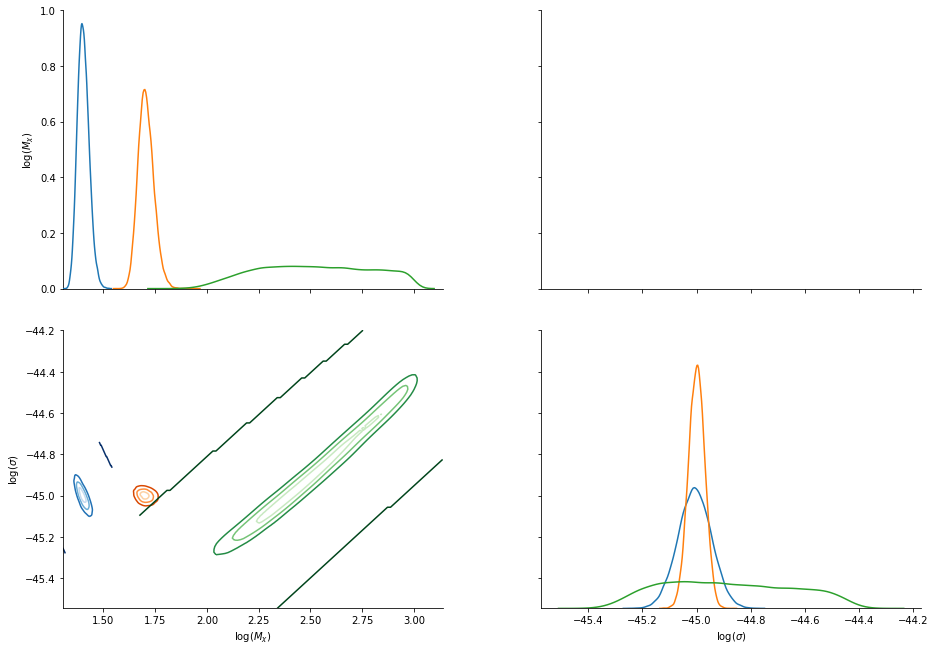

In [38]:
%%time
# data = sns.load_dataset('iris')
# plt.figure(figsize=(15,10))
def make_kde(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

def make_kde_cbar(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
kwargs ={"cbar":True, "n_levels":5}
make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
pg.map_lower(make_kde)
# pg.map_upper(make_kde_cbar)
pg.fig.set_size_inches(15,10)
pg.fig.savefig(f"{det}_fixed_astroph.png", dpi =300)
pg.fig.savefig(f"{det}_fixed_astroph.pdf", dpi =300)

In [39]:
items = [24, 25, 0]
data = get_df(items)
print(np.unique(data.mass), len(data))
data.head(3)

[ 25.  50. 250.] 124678


$\log(M_\chi)$  $\log(\sigma)$   mass
0        2.663437      -44.783158  250.0
1        1.835278      -45.207758  250.0
2        1.843093      -45.104980  250.0

Wall time: 1min 6s


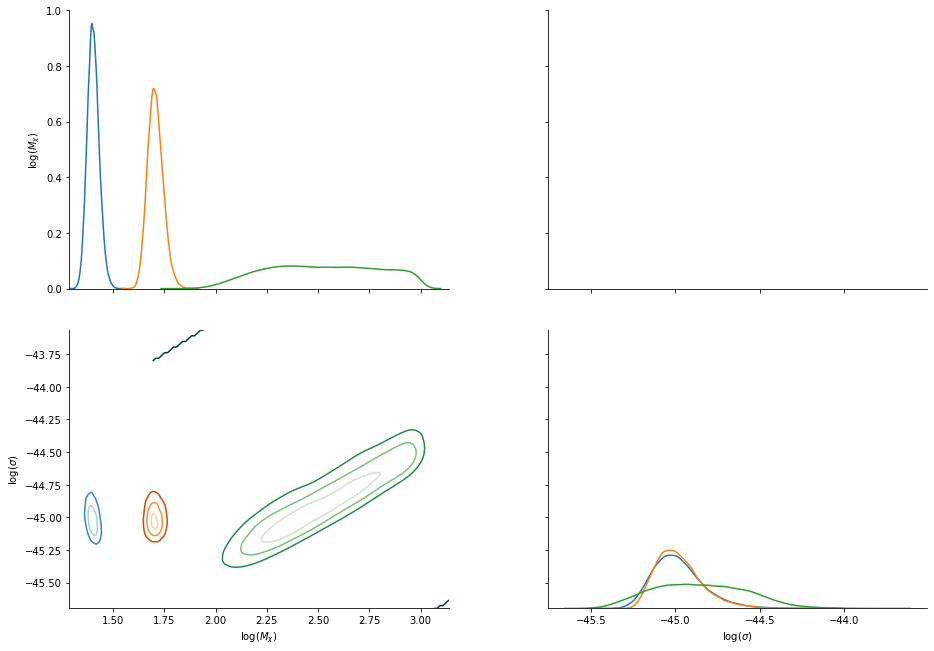

In [40]:
%%time
# data = sns.load_dataset('iris')
# plt.figure(figsize=(15,10))
def make_kde(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, *args, cmap=next(make_kde.cmap_cycle), **kwargs)

def make_kde_cbar(*args, **kwargs):  
    #"cbar":True, 
#     opts ={"n_levels":5}
    sns.kdeplot(n_levels = 3, cbar = True, *args, cmap=next(make_kde.cmap_cycle), **kwargs)
kwargs ={"cbar":True, "n_levels":5}
make_kde.cmap_cycle = cycle(('Blues_r', 'Oranges_r', 'Greens_r'))

pg = sns.PairGrid(data, vars=('$\log(M_\chi)$', '$\log(\sigma)$'), hue='mass')
pg.map_diag(sns.kdeplot)#, color = ({)'b', 'g', 'r'})
pg.map_lower(make_kde)
# pg.map_upper(make_kde_cbar)
pg.fig.set_size_inches(15,10)
pg.fig.savefig(f"{det}_loose_astroph.png", dpi =300)
pg.fig.savefig(f"{det}_loose_astroph.pdf", dpi =300)

In [ ]:
# np.shape(np.random.normal(1, 1, 10**6))


In [ ]:
from scipy.stats.mstats import mquantiles

In [ ]:
# x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=test[0], y=test[1], kind="hex", color="k");

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(test[0], test[1], ax=ax)
sns.rugplot(test[0], color="g", ax=ax)
sns.rugplot(test[1], vertical=True, ax=ax);

In [ ]:
test_df = pd.DataFrame()
test_df['x'] = test[0]
test_df['y'] = test[1]

In [ ]:
sns.jointplot(x="x", y="y", data=test_df, kind="kde");

In [ ]:
items = selected_keys

def plot_posterior(items):
    posteriors = [get_p_i(item) for item in items]
    test_df = pd.DataFrame()

    test_df['x'] = np.concatenate([p[0] for p in posteriors])
    test_df['y'] = np.concatenate([p[1] for p in posteriors])
    sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                 ylim = [-46,-44],
                 xlim = [1,3]);
plot_posterior(items)

In [ ]:
items = selected_keys[:3]
def plot_posterior_per_item(items):
    for item in items:
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()

        test_df['x'] = posteriors[0]
        test_df['y'] = posteriors[1]
        sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                     ylim = [-46,-44],
                     xlim = [1,3]);
plot_posterior_per_item(items)

In [ ]:
items = selected_keys[:3]

# sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#                      ylim = [-46,-44],
#                      xlim = [1,3]);
def plot_posterior_per_item(items):
    for j, item in enumerate(items):
        posteriors = get_p_i(item)
        test_df = pd.DataFrame()

        test_df[f'x'] = posteriors[0]
        test_df[f'y'] = posteriors[1]
        if j ==0:
            
            grid = sns.JointGrid(x="x", y="y", data=test_df)
        grid = grid.plot_joint(
            sns.jointplot(x="x", y="y", data=test_df, kind="kde",
                     ylim = [-46,-44],
                     xlim = [1,3]));
plot_posterior_per_item(items)

In [ ]:
selected_keys

In [ ]:
for key in [40,46]:
    print(results[key]['config']['mw'])

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test.T/np.sum(test.T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test.T/np.sum(test.T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
X, Y = np.meshgrid(*test2[1:])
plt.pcolormesh(X, Y, test2[0].T/np.sum(test2[0].T), norm = LogNorm())
plt.colorbar()
plt.show()

In [ ]:
# %time
# items = results.keys()
# def get_p_i(i):
#     return get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
# posteriors = [get_p_i(item) for item in items]
# test_df = pd.DataFrame()

# test_df['x'] = np.concatenate([p[0] for p in posteriors])
# test_df['y'] = np.concatenate([p[1] for p in posteriors])
# sns.jointplot(x="x", y="y", data=test_df, kind="kde",
#              ylim = [-46,-44],
#              xlim = [1,3]);